In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv("Wuppi convertido.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,Administrador,Usuario,botón correcto,tiempo de interacción,mini juego,número de interacción,color presionado,dificultad,fecha,Juego,auto push,tiempo de lección,tiempo de sesión
0,0,0,2.0,3.0,1.0,5.399169,9.0,1.0,4.0,1.0,25/01/2024 09:26:42 a. m.,1.0,0.0,0.0,0.0
1,1,1,2.0,3.0,0.0,1.283400,9.0,2.0,1.0,1.0,25/01/2024 09:26:46 a. m.,1.0,0.0,0.0,0.0
2,2,2,2.0,3.0,1.0,2.700226,9.0,3.0,2.0,1.0,25/01/2024 09:26:48 a. m.,1.0,0.0,0.0,0.0
3,3,3,2.0,3.0,0.0,3.050262,9.0,4.0,2.0,1.0,25/01/2024 09:26:57 a. m.,1.0,0.0,0.0,0.0
4,4,4,2.0,3.0,0.0,4.750256,9.0,5.0,2.0,1.0,25/01/2024 09:26:58 a. m.,1.0,0.0,0.0,0.0


In [4]:
df = df.drop(columns=["Unnamed: 0.1","Unnamed: 0","fecha"])

# Columna objetivo Tiempo de Interacción

In [5]:
Corr_Factors =df.corr()
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1.head()

,Administrador,Usuario,botón correcto,tiempo de interacción,mini juego,número de interacción,color presionado,dificultad,Juego,auto push,tiempo de lección,tiempo de sesión
Administrador,1.000000,0.367783,0.057388,0.023198,0.006635,0.080123,0.055421,0.099609,0.080074,0.004080,0.044328,0.020546
Usuario,0.367783,1.000000,0.089893,0.079054,0.087822,0.099914,0.088253,0.100570,0.350478,0.123459,0.071091,0.023883
botón correcto,0.057388,0.089893,1.000000,0.903912,0.434521,0.691533,0.999374,0.026733,0.031036,0.035770,0.612377,0.277868
tiempo de interacción,0.023198,0.079054,0.903912,1.000000,0.395837,0.802379,0.902371,0.051854,0.057443,0.063312,0.554115,0.251431
mini juego,0.006635,0.087822,0.434521,0.395837,1.000000,0.282634,0.434362,0.086657,0.108371,0.001500,0.029536,0.642302


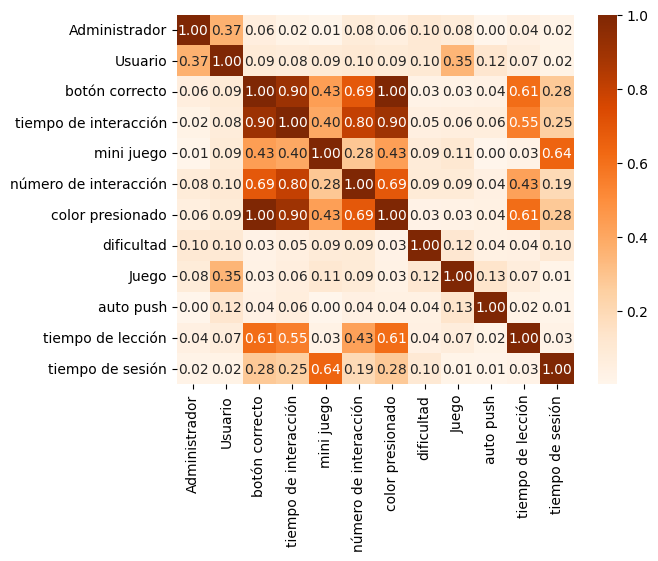

In [6]:
Heat_Map = sns.heatmap(Corr_Factors1, cmap="Oranges", annot=True, fmt=".2f")

# Correlaciones 
1. Administrador            0.02
2. Usuario                  0.079
3. botón correcto           0.90
4. tiempo de interacción    1.00
5. mini juego               0.40
6. número de interacción    0.80
7. color presionado         0.90
8. dificultad               0.052
9. Juego                    0.057
10. auto push                0.06
11. tiempo de lección        0.55
12. tiempo de sesión         0.25

# Modelos 
   ** Usamos las siguientes ecuaciones como funciones de ajuste.**

            y = ax^2 + bx + c   ("Función cuadrática") 

            y = a*exp(-bx) + c   ("Función exponencial") 

            y = 1/a*x           ("Función inversa") 

            y = a*np.sin(x) + b ("Función senoidal") 

            y = a*np.tan(x) + b ("Función tangencial") 

            y = a*np.abs(x) + b*x + c (Función Valor absoluto) 

            y = (a*x**2 + b)/ c*x (Función cociente entre polinomios) 

            y = a*np.log(x) + b  (Función logaritmica) 

            y = a*x + b*x + c*x (Función lineal con producto de coeficientes) 

            y = 1/a*x**2  (Función cuadrática inversa) 

            y = a/b*x**2 + c*x (Función polinomial inversa) 


Correlacion de 0.903912 vs 0.906

Parámetros ajustados: [ 0.04845969 -3.91763294 11.89226916]


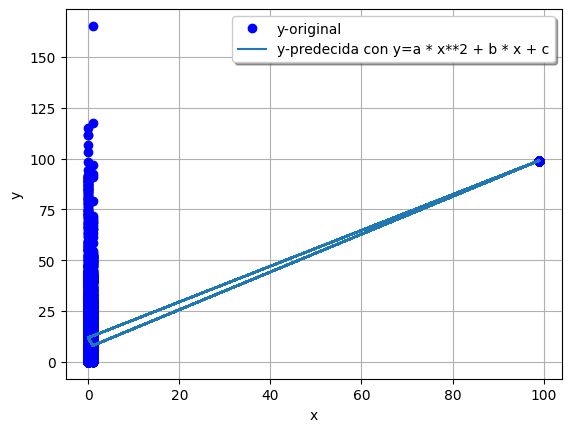

R^2 del Modelo 1: 0.8215830883893092
R del Modelo 1: 0.9064122066638937


In [7]:
Vars_Indep= df[["botón correcto"]]
Var_Dep= df["tiempo de interacción"]
x= Vars_Indep
y= Var_Dep

def func_cuadratica(x, a, b, c):  
    return a * x**2 + b * x + c


parametros1, covs = curve_fit(func_cuadratica, df["botón correcto"], df["tiempo de interacción"])  


print("Parámetros ajustados:", parametros1)  
 
y_pred1 = func_cuadratica(x, *parametros1)  

# Gráfico de los resultados  
plt.plot(x, y, 'bo', label="y-original")  
plt.plot(x, y_pred1, label="y-predecida con y=a * x**2 + b * x + c")  
plt.xlabel('x')  
plt.ylabel('y')  
plt.legend(loc='best', fancybox=True, shadow=True)  
plt.grid(True)  
plt.show()  

# Cálculo del coeficiente de determinación 
R2_Modelo1 = r2_score(y, y_pred1)  
print("R^2 del Modelo 1:", R2_Modelo1)  

# Cálculo de R  
R = np.sqrt(R2_Modelo1)  
print("R del Modelo 1:", R) 

# Analisis por usuario

# Leornado

In [8]:
#leornardo (1)
df_filtrado1 = df[df['Usuario'] == 1]  
df_filtrado1.head()

,Administrador,Usuario,botón correcto,tiempo de interacción,mini juego,número de interacción,color presionado,dificultad,Juego,auto push,tiempo de lección,tiempo de sesión
179,3.0,1.0,1.0,10.558070,9.0,1.0,4.0,1.0,1.0,0.0,0.0,0.0
180,3.0,1.0,0.0,1.249828,9.0,2.0,4.0,1.0,1.0,0.0,0.0,0.0
181,3.0,1.0,1.0,1.866516,9.0,3.0,2.0,1.0,1.0,0.0,0.0,0.0
182,3.0,1.0,0.0,10.099820,9.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0
183,3.0,1.0,0.0,17.817100,9.0,5.0,1.0,1.0,1.0,0.0,0.0,0.0


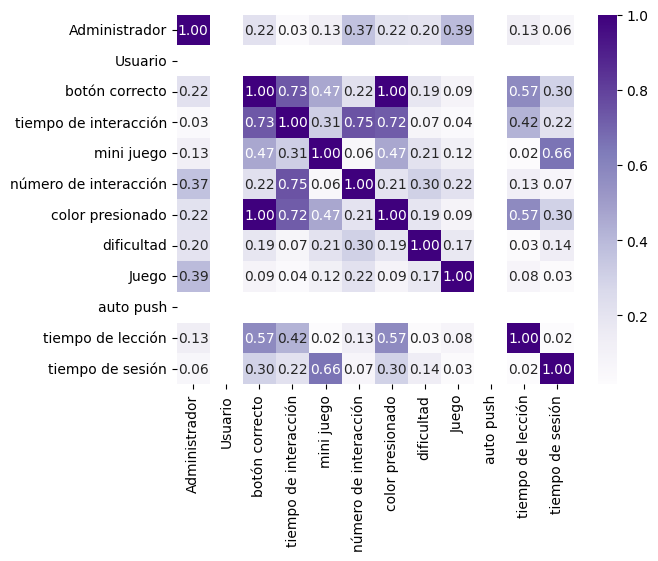

In [9]:
#Heat map 
Corr_Factors =df_filtrado1.corr()
Corr_Factors = abs(Corr_Factors)
Heat_Map_Leonardo = sns.heatmap(Corr_Factors, cmap="Purples", annot=True, fmt=".2f")

In [10]:
Corr_Factors = abs(Corr_Factors)
Corr_Factors

,Administrador,Usuario,botón correcto,tiempo de interacción,mini juego,número de interacción,color presionado,dificultad,Juego,auto push,tiempo de lección,tiempo de sesión
Administrador,1.000000,NaN,0.219028,0.034486,0.127578,0.365267,0.216252,0.202905,0.390477,NaN,0.132274,0.064751
Usuario,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
botón correcto,0.219028,NaN,1.000000,0.731554,0.465786,0.221510,0.999082,0.189427,0.088227,NaN,0.574275,0.297817
tiempo de interacción,0.034486,NaN,0.731554,1.000000,0.314546,0.749820,0.723016,0.072243,0.036795,NaN,0.421830,0.218760
mini juego,0.127578,NaN,0.465786,0.314546,1.000000,0.056208,0.465747,0.209324,0.118064,NaN,0.018425,0.655218
número de interacción,0.365267,NaN,0.221510,0.749820,0.056208,1.000000,0.206772,0.302081,0.218309,NaN,0.130341,0.067595
color presionado,0.216252,NaN,0.999082,0.723016,0.465747,0.206772,1.000000,0.191266,0.087333,NaN,0.573850,0.297597
dificultad,0.202905,NaN,0.189427,0.072243,0.209324,0.302081,0.191266,1.000000,0.174625,NaN,0.031090,0.137281
Juego,0.390477,NaN,0.088227,0.036795,0.118064,0.218309,0.087333,0.174625,1.000000,NaN,0.076776,0.031871
auto push,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Utlizando como variable objetivo

### tiempo de interacción con boton correcto (Correlación de 0.73)

Parámetros ajustados: [  0.14582037 -13.63427981  19.60826801]


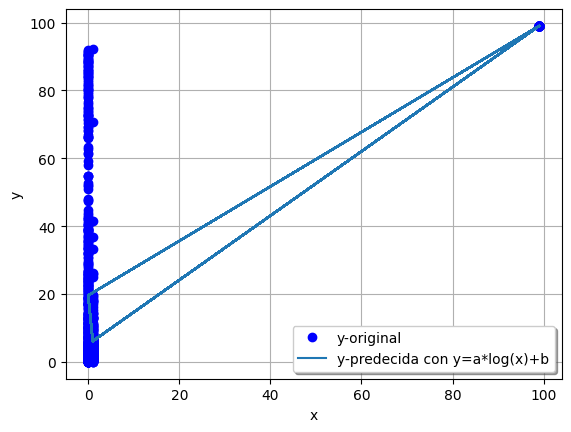

R^2 del Modelo 1: 0.5723633196694657
R del Modelo 1: 0.7565469712248313


In [11]:
Vars_Indep= df_filtrado1[["botón correcto"]]
Var_Dep= df_filtrado1["tiempo de interacción"]
x= Vars_Indep
y= Var_Dep

def func_cuadratica(x, a, b, c):  
    return a * x**2 + b * x + c  

parametros1, covs = curve_fit(func_cuadratica, df_filtrado1["botón correcto"], df_filtrado1["tiempo de interacción"])  


print("Parámetros ajustados:", parametros1)  
  
y_pred1 = func_cuadratica(x, *parametros1)  

# Gráfica
plt.plot(x, y, 'bo', label="y-original")    
plt.plot(x, y_pred1, label="y-predecida con y=a * x**2 + b * x + c")  
plt.xlabel('x')  
plt.ylabel('y')  
plt.legend(loc='best', fancybox=True, shadow=True)  
plt.grid(True)  
plt.show()  

# Cálculo del coeficiente de determinación  
R2_Modelo1 = r2_score(y, y_pred1)  
print("R^2 del Modelo 1:", R2_Modelo1)  

# Cálculo de R  
R = np.sqrt(R2_Modelo1)  
print("R del Modelo 1:", R)  

### botón correcto con tiempo de interacción (Correlación 0.73)

Parámetros ajustados: [ 0.019278   -1.18467919  5.79257013]


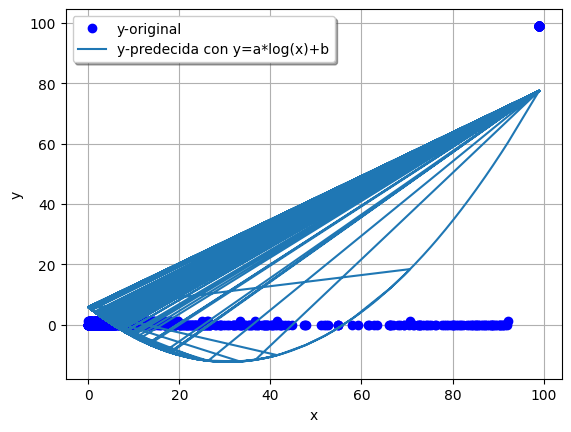

R^2 del Modelo 1: 0.759194635011261
R del Modelo 1: 0.8713177577733975


In [12]:
Vars_Indep= df_filtrado1[["tiempo de interacción"]]
Var_Dep= df_filtrado1["botón correcto"]
x= Vars_Indep
y= Var_Dep
def func_cuadratica(x, a, b, c):  
    return a * x**2 + b * x + c 



# Ajuste de la curva  
parametros1, covs = curve_fit(func_cuadratica, df_filtrado1["tiempo de interacción"], df_filtrado1["botón correcto"])  


print("Parámetros ajustados:", parametros1)  

 
y_pred1 = func_cuadratica(x, *parametros1)  

# Gráfica
plt.plot(x, y, 'bo', label="y-original")    
plt.plot(x, y_pred1, label="y-predecida con y=a * x**2 + b * x + c")  
plt.xlabel('x')  
plt.ylabel('y')  
plt.legend(loc='best', fancybox=True, shadow=True)  
plt.grid(True)  
plt.show()  

# Cálculo del coeficiente de determinación  
R2_Modelo1 = r2_score(y, y_pred1)  
print("R^2 del Modelo 1:", R2_Modelo1)  

# Cálculo de R  
R = np.sqrt(R2_Modelo1)  
print("R del Modelo 1:", R)  

### color presionado con tiempo de interación (Correlación simple 0.72)

Parámetros ajustados: [ 0.01909513 -1.18704151  7.95018213]


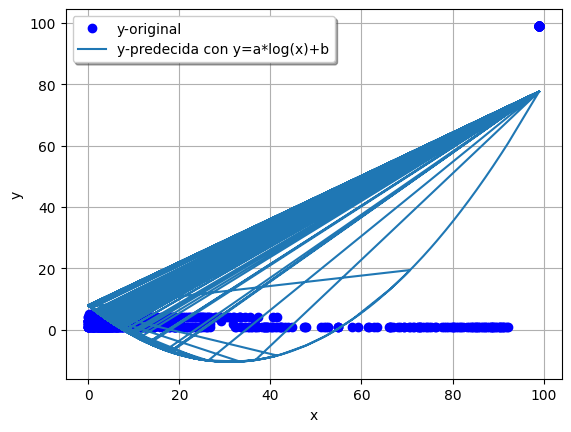

R^2 del Modelo 1: 0.7513527334013506
R del Modelo 1: 0.8668060529330368


In [13]:
Vars_Indep= df_filtrado1[["tiempo de interacción"]]
Var_Dep= df_filtrado1["color presionado"]
x= Vars_Indep
y= Var_Dep

def func_cuadratica(x, a, b, c):  
    return a * x**2 + b * x + c 


# Ajuste de la curva  
parametros1, covs = curve_fit(func_cuadratica, df_filtrado1["tiempo de interacción"], df_filtrado1["color presionado"])  


print("Parámetros ajustados:", parametros1)  

y_pred1 = func_cuadratica(x, *parametros1)  

# Gráfica
plt.plot(x, y, 'bo', label="y-original")    
plt.plot(x, y_pred1, label="y-predecida con y=a * x**2 + b * x + c")  
plt.xlabel('x')  
plt.ylabel('y')  
plt.legend(loc='best', fancybox=True, shadow=True)  
plt.grid(True)  
plt.show()  

# Cálculo del coeficiente de determinación  
R2_Modelo1 = r2_score(y, y_pred1)  
print("R^2 del Modelo 1:", R2_Modelo1)  

# Cálculo de R  
R = np.sqrt(R2_Modelo1)  
print("R del Modelo 1:", R)  

### Dificultad con mini juego 0.190457

Parámetros ajustados: [-3.44335456e-04  4.87415482e-02  1.49166396e+00]


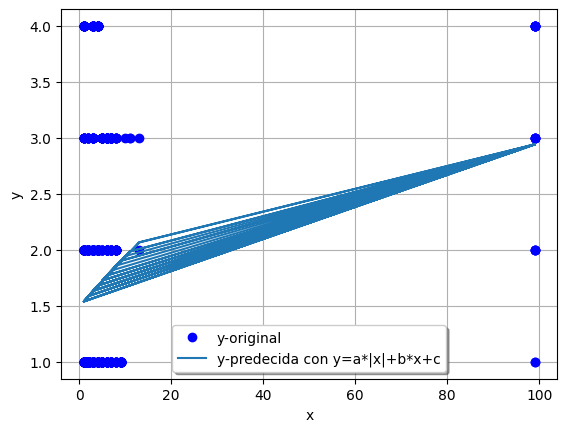

R^2 del Modelo 1: 0.04939433487717648
R del Modelo 1: 0.22224836304723705


In [14]:
Vars_Indep= df_filtrado1[["mini juego"]]
Var_Dep= df_filtrado1["dificultad"]
x= Vars_Indep
y= Var_Dep
def func_cuadratica(x, a, b, c):  
    return a * x**2 + b * x + c   
 

# Ajuste de la curva  
parametros1, covs = curve_fit(func_cuadratica, df_filtrado1["mini juego"], df_filtrado1["dificultad"])  

# Mostrar los parámetros optimizados  
print("Parámetros ajustados:", parametros1)  

# Predecir los valores de y usando los parámetros ajustados  
y_pred1 = func_cuadratica(x, *parametros1)  

# Gráfico de los resultados  
plt.plot(x, y, 'bo', label="y-original")  # Datos originales  
plt.plot(x, y_pred1, label="y-predecida con y=a * x**2 + b * x + c")  # Curva ajustada  
plt.xlabel('x')  
plt.ylabel('y')  
plt.legend(loc='best', fancybox=True, shadow=True)  
plt.grid(True)  
plt.show()  

# Cálculo del coeficiente de determinación R^2  
R2_Modelo1 = r2_score(y, y_pred1)  
print("R^2 del Modelo 1:", R2_Modelo1)  

# Cálculo de R  
R = np.sqrt(R2_Modelo1)  
print("R del Modelo 1:", R) 


# Ma del Rosario

In [15]:
#MA del rosario
df_filtrado2 = df[df['Usuario'] == 24]  
df_filtrado2.head()

,Administrador,Usuario,botón correcto,tiempo de interacción,mini juego,número de interacción,color presionado,dificultad,Juego,auto push,tiempo de lección,tiempo de sesión
5713,1.0,24.0,1.0,19.303690,3.0,1.0,4.0,1.0,1.0,0.0,0.0,0.0
5714,1.0,24.0,1.0,6.267806,3.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0
5715,1.0,24.0,1.0,5.766922,3.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0
5716,1.0,24.0,0.0,7.450372,3.0,4.0,4.0,1.0,1.0,0.0,0.0,0.0
5717,1.0,24.0,0.0,7.564992,3.0,5.0,4.0,1.0,1.0,0.0,0.0,0.0


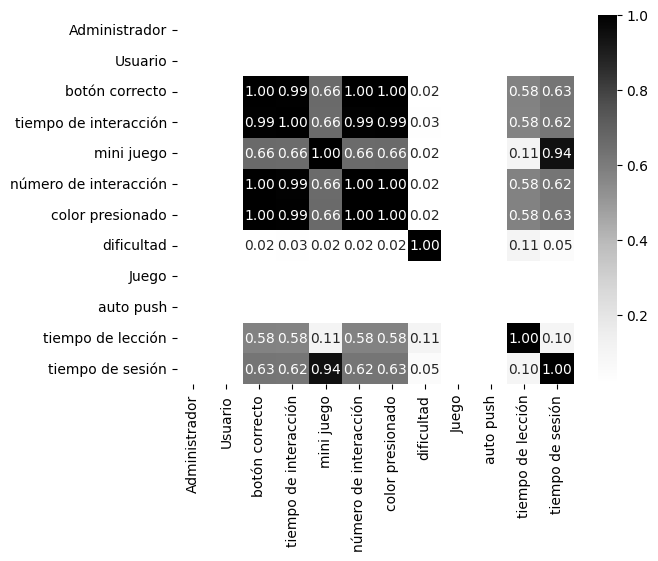

In [16]:
#Heat map 
Corr_Factors =df_filtrado2.corr()
Corr_Factors = abs(Corr_Factors)
Heat_Map_MA_Del_Rosario = sns.heatmap(Corr_Factors, cmap="Greys", annot=True, fmt=".2f")

In [17]:
Corr_Factors

,Administrador,Usuario,botón correcto,tiempo de interacción,mini juego,número de interacción,color presionado,dificultad,Juego,auto push,tiempo de lección,tiempo de sesión
Administrador,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Usuario,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
botón correcto,NaN,NaN,1.000000,0.993117,0.662648,0.998162,0.999520,0.022086,NaN,NaN,0.579607,0.625791
tiempo de interacción,NaN,NaN,0.993117,1.000000,0.658366,0.990116,0.993217,0.025889,NaN,NaN,0.575772,0.621650
mini juego,NaN,NaN,0.662648,0.658366,1.000000,0.661220,0.662282,0.016640,NaN,NaN,0.108718,0.944773
número de interacción,NaN,NaN,0.998162,0.990116,0.661220,1.000000,0.997668,0.020706,NaN,NaN,0.578530,0.624627
color presionado,NaN,NaN,0.999520,0.993217,0.662282,0.997668,1.000000,0.015142,NaN,NaN,0.579412,0.625580
dificultad,NaN,NaN,0.022086,0.025889,0.016640,0.020706,0.015142,1.000000,NaN,NaN,0.109785,0.046691
Juego,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
auto push,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### tiempo de interaccion como objetvio  con boton correcto (0.982055)

In [18]:
Vars_Indep= df_filtrado2[["botón correcto"]]
Var_Dep= df_filtrado2["tiempo de interacción"]
x= Vars_Indep
y= Var_Dep

Parámetros ajustados: [20.18248863  6.25904587]


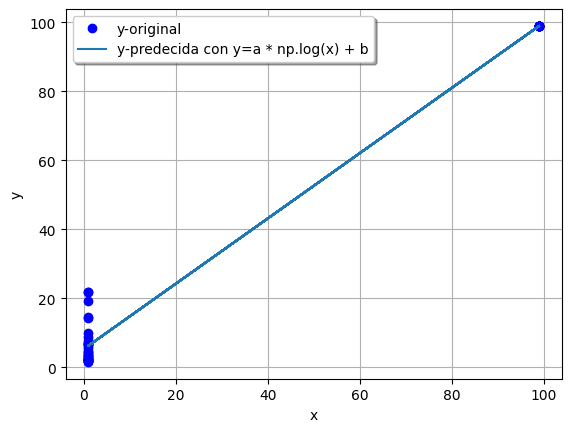

R^2 del Modelo 1: 0.9876339832306752
R del Modelo 1: 0.9937977577106296


In [23]:
def func5(x, a, b):  
    """Función logarítmica: y = a * log(x) + b"""  
    return a * np.log(x) + b  



# Ajuste de la curva  
parametros1, covs = curve_fit(func5, df_filtrado2["botón correcto"], df_filtrado2["tiempo de interacción"])  


print("Parámetros ajustados:", parametros1)  

  
x = df_filtrado2["botón correcto"].values  
y = df_filtrado2["tiempo de interacción"].values    
y_pred1 = func5(x, *parametros1)  

# Gráfica
plt.plot(x, y, 'bo', label="y-original")    
plt.plot(x, y_pred1, label="y-predecida con y=a * np.log(x) + b")  
plt.xlabel('x')  
plt.ylabel('y')  
plt.legend(loc='best', fancybox=True, shadow=True)  
plt.grid(True)  
plt.show()  

# Cálculo del coeficiente de determinación  
R2_Modelo1 = r2_score(y, y_pred1)  
print("R^2 del Modelo 1:", R2_Modelo1)  

# Cálculo de R  
R = np.sqrt(R2_Modelo1)  
print("R del Modelo 1:", R)  

### Boton correcto con tiempo de interacción (0.982055)

Parámetros ajustados: [ 0.01264479 -0.27004829  1.79932098]


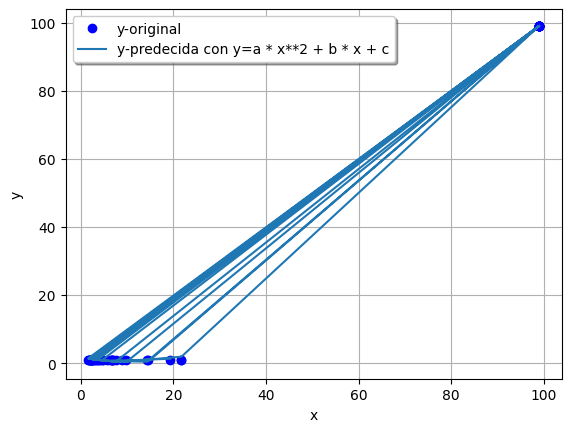

R^2 del Modelo 1: 0.9999435708217828
R del Modelo 1: 0.9999717850128487


In [24]:
Vars_Indep= df_filtrado2[["tiempo de interacción"]]
Var_Dep= df_filtrado2["botón correcto"]
x= Vars_Indep
y= Var_Dep

def func_cuadratica(x, a, b, c):  
    return a * x**2 + b * x + c  


# Ajuste de la curva  
parametros1, covs = curve_fit(func_cuadratica, df_filtrado2["tiempo de interacción"], df_filtrado2["botón correcto"])  


print("Parámetros ajustados:", parametros1)  

  
x = df_filtrado2["tiempo de interacción"].values  
y = df_filtrado2["botón correcto"].values    
y_pred1 = func_cuadratica(x, *parametros1)  

# Gráfica
plt.plot(x, y, 'bo', label="y-original")    
plt.plot(x, y_pred1, label="y-predecida con y=a * x**2 + b * x + c")  
plt.xlabel('x')  
plt.ylabel('y')  
plt.legend(loc='best', fancybox=True, shadow=True)  
plt.grid(True)  
plt.show()  

# Cálculo del coeficiente de determinación  
R2_Modelo1 = r2_score(y, y_pred1)  
print("R^2 del Modelo 1:", R2_Modelo1)  

# Cálculo de R  
R = np.sqrt(R2_Modelo1)  
print("R del Modelo 1:", R)  

### Color presionado (0.981504)

Parámetros ajustados: [ 0.01207383 -0.2269293   3.12794274]


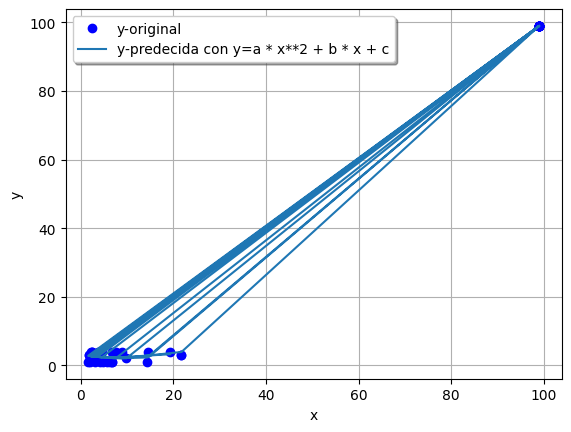

R^2 del Modelo 1: 0.999472488184186
R del Modelo 1: 0.9997362092993262


In [25]:
Vars_Indep= df_filtrado2[["tiempo de interacción"]]
Var_Dep= df_filtrado2["color presionado"]
x= Vars_Indep
y= Var_Dep

def func_cuadratica(x, a, b, c):  
    return a * x**2 + b * x + c 

# Ajuste de la curva  
parametros1, covs = curve_fit(func_cuadratica, df_filtrado2["tiempo de interacción"], df_filtrado2["color presionado"])  


print("Parámetros ajustados:", parametros1)  

  
x = df_filtrado2["tiempo de interacción"].values  
y = df_filtrado2["color presionado"].values    
y_pred1 = func_cuadratica(x, *parametros1)  

# Gráfica
plt.plot(x, y, 'bo', label="y-original")    
plt.plot(x, y_pred1, label="y-predecida con y=a * x**2 + b * x + c")  
plt.xlabel('x')  
plt.ylabel('y')  
plt.legend(loc='best', fancybox=True, shadow=True)  
plt.grid(True)  
plt.show()  

# Cálculo del coeficiente de determinación  
R2_Modelo1 = r2_score(y, y_pred1)  
print("R^2 del Modelo 1:", R2_Modelo1)  

# Cálculo de R  
R = np.sqrt(R2_Modelo1)  
print("R del Modelo 1:", R)  

### Dificultad con tiempo de lección 0.109785 vs 0.14703

Parámetros ajustados: [0.01589103 2.72129351]


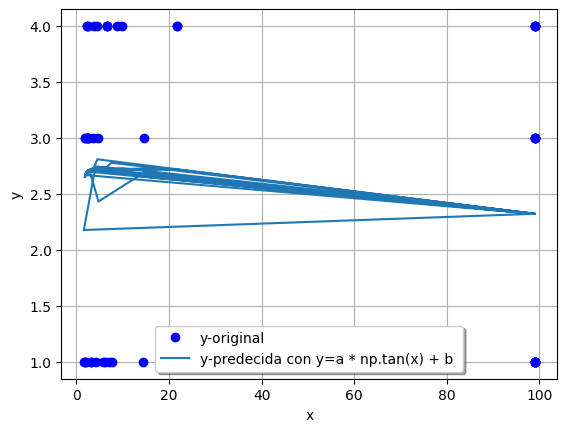

R^2 del Modelo 1: 0.021618355039906834
R del Modelo 1: 0.14703181642048374


In [26]:
Vars_Indep= df_filtrado2[["tiempo de lección"]]
Var_Dep= df_filtrado2["dificultad"]
x= Vars_Indep
y= Var_Dep

def func_tangencial(x, a, b):  
    return a * np.tan(x) + b     


# Ajuste de la curva  
parametros1, covs = curve_fit(func_tangencial, df_filtrado2["tiempo de interacción"], df_filtrado2["dificultad"])  


print("Parámetros ajustados:", parametros1)  

  
x = df_filtrado2["tiempo de interacción"].values  
y = df_filtrado2["dificultad"].values    
y_pred1 = func_tangencial(x, *parametros1)  

# Gráfica
plt.plot(x, y, 'bo', label="y-original")    
plt.plot(x, y_pred1, label="y-predecida con y=a * np.tan(x) + b ")  
plt.xlabel('x')  
plt.ylabel('y')  
plt.legend(loc='best', fancybox=True, shadow=True)  
plt.grid(True)  
plt.show()  

# Cálculo del coeficiente de determinación  
R2_Modelo1 = r2_score(y, y_pred1)  
print("R^2 del Modelo 1:", R2_Modelo1)  

# Cálculo de R  
R = np.sqrt(R2_Modelo1)  
print("R del Modelo 1:", R)  

# Nicolas

In [27]:
#Nicolas
df_filtrado3 = df[df['Usuario'] == 3]  
df_filtrado3.head()

,Administrador,Usuario,botón correcto,tiempo de interacción,mini juego,número de interacción,color presionado,dificultad,Juego,auto push,tiempo de lección,tiempo de sesión
0,2.0,3.0,1.0,5.399169,9.0,1.0,4.0,1.0,1.0,0.0,0.0,0.0
1,2.0,3.0,0.0,1.283400,9.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0
2,2.0,3.0,1.0,2.700226,9.0,3.0,2.0,1.0,1.0,0.0,0.0,0.0
3,2.0,3.0,0.0,3.050262,9.0,4.0,2.0,1.0,1.0,0.0,0.0,0.0
4,2.0,3.0,0.0,4.750256,9.0,5.0,2.0,1.0,1.0,0.0,0.0,0.0


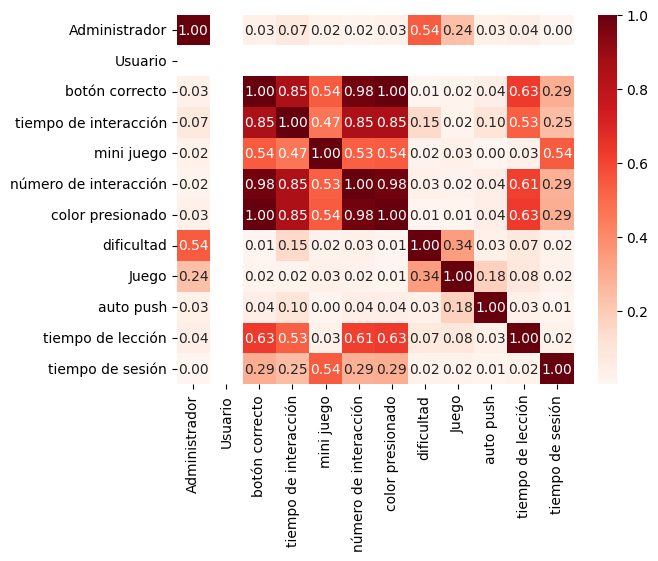

In [28]:
#Heat map 
Corr_Factors =df_filtrado3.corr()
Corr_Factors = abs(Corr_Factors)
Heat_Map_Nico = sns.heatmap(Corr_Factors, cmap="Reds", annot=True, fmt=".2f")

In [29]:
Corr_Factors

,Administrador,Usuario,botón correcto,tiempo de interacción,mini juego,número de interacción,color presionado,dificultad,Juego,auto push,tiempo de lección,tiempo de sesión
Administrador,1.000000,NaN,0.032034,0.074209,0.023071,0.016966,0.028521,0.537313,0.237799,0.034694,0.042443,0.003690
Usuario,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
botón correcto,0.032034,NaN,1.000000,0.849406,0.539327,0.980337,0.999286,0.009011,0.015579,0.041377,0.626699,0.291264
tiempo de interacción,0.074209,NaN,0.849406,1.000000,0.465908,0.845244,0.847909,0.148496,0.017853,0.102079,0.532188,0.247339
mini juego,0.023071,NaN,0.539327,0.465908,1.000000,0.529302,0.539593,0.018011,0.028623,0.002358,0.031036,0.538202
número de interacción,0.016966,NaN,0.980337,0.845244,0.529302,1.000000,0.979839,0.027342,0.020845,0.043839,0.614599,0.285640
color presionado,0.028521,NaN,0.999286,0.847909,0.539593,0.979839,1.000000,0.008106,0.010795,0.042266,0.626409,0.291129
dificultad,0.537313,NaN,0.009011,0.148496,0.018011,0.027342,0.008106,1.000000,0.343644,0.029371,0.074766,0.020337
Juego,0.237799,NaN,0.015579,0.017853,0.028623,0.020845,0.010795,0.343644,1.000000,0.179682,0.078888,0.019927
auto push,0.034694,NaN,0.041377,0.102079,0.002358,0.043839,0.042266,0.029371,0.179682,1.000000,0.027586,0.012821


### tiempo de interaccion (0.93)  fue el mas alto 0.84

Parámetros ajustados: [ 0.01603081 -0.72001932 13.1628264 ]


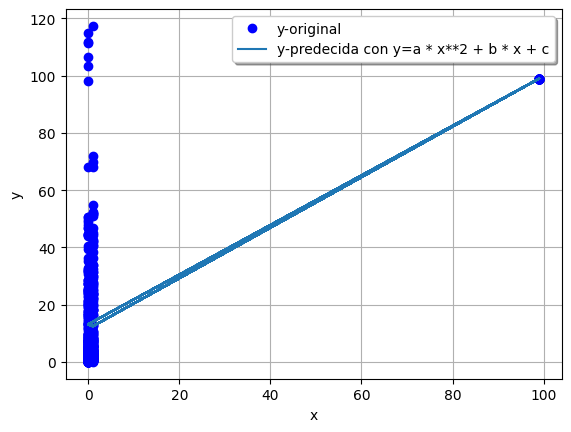

R^2 del Modelo 1: 0.7185724899995838
R del Modelo 1: 0.8476865517392521


In [31]:
Vars_Indep= df_filtrado3[["botón correcto"]]
Var_Dep= df_filtrado3["tiempo de interacción"]
x= Vars_Indep
y= Var_Dep
 
def func_cuadratica(x, a, b, c):  
    return a * x**2 + b * x + c  

# Ajuste de la curva  
parametros1, covs = curve_fit(func_cuadratica, df_filtrado3["color presionado"], df_filtrado3["tiempo de interacción"])  


print("Parámetros ajustados:", parametros1)  
   
y_pred1 = func_cuadratica(x, *parametros1)   

# Gráfico de los resultados  
plt.plot(x, y, 'bo', label="y-original")  # Datos originales  
plt.plot(x, y_pred1, label="y-predecida con y=a * x**2 + b * x + c")  # Curva ajustada  
plt.xlabel('x')  
plt.ylabel('y')  
plt.legend(loc='best', fancybox=True, shadow=True)  
plt.grid(True)  
plt.show()  

# Cálculo del coeficiente de determinación  
R2_Modelo1 = r2_score(y, y_pred1)  
print("R^2 del Modelo 1:", R2_Modelo1)  

# Cálculo de R  
R = np.sqrt(R2_Modelo1)  
print("R del Modelo 1:", R)

### boton correcto con numero de interacción (0.99)

Parámetros ajustados: [99.22578859]


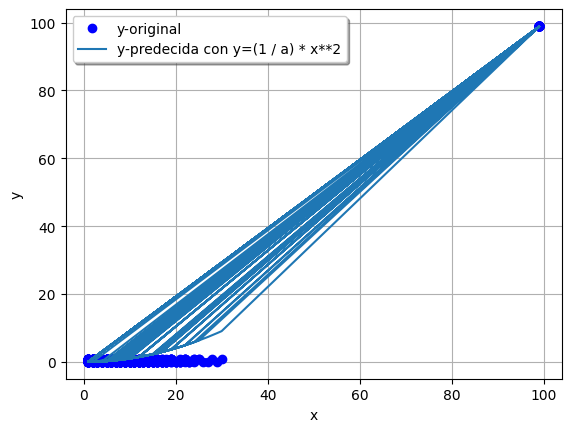

R^2 del Modelo 1: 0.9974366638653631
R del Modelo 1: 0.9987175095417938


In [32]:
Vars_Indep= df_filtrado3[["número de interacción"]]
Var_Dep= df_filtrado3["botón correcto"]
x= Vars_Indep
y= Var_Dep

def func_cuadratica_inversa(x, a):  
    return (1 / a) * x**2   


# Ajuste de la curva  
parametros1, covs = curve_fit(func_cuadratica_inversa, df_filtrado3["número de interacción"], df_filtrado3["botón correcto"])  


print("Parámetros ajustados:", parametros1)  
   
y_pred1 = func_cuadratica_inversa(x, *parametros1)   

# Gráfico de los resultados  
plt.plot(x, y, 'bo', label="y-original")  # Datos originales  
plt.plot(x, y_pred1, label="y-predecida con y=(1 / a) * x**2")  # Curva ajustada  
plt.xlabel('x')  
plt.ylabel('y')  
plt.legend(loc='best', fancybox=True, shadow=True)  
plt.grid(True)  
plt.show()  

# Cálculo del coeficiente de determinación  
R2_Modelo1 = r2_score(y, y_pred1)  
print("R^2 del Modelo 1:", R2_Modelo1)  

# Cálculo de R  
R = np.sqrt(R2_Modelo1)  
print("R del Modelo 1:", R)

### color presionado con número de interacción (0.99)

Parámetros ajustados: [ 0.01253487 -0.27618302  3.46073799]


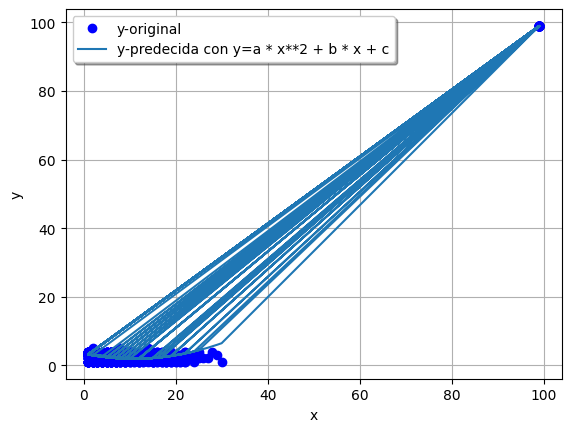

R^2 del Modelo 1: 0.9985355402167999
R del Modelo 1: 0.9992675018316166


In [33]:
Vars_Indep= df_filtrado3[["número de interacción"]]
Var_Dep= df_filtrado3["color presionado"]
x= Vars_Indep
y= Var_Dep

def func_cuadratica(x, a, b, c):  
    return a * x**2 + b * x + c  


# Ajuste de la curva  
parametros1, covs = curve_fit(func_cuadratica, df_filtrado3["número de interacción"], df_filtrado3["color presionado"])  


print("Parámetros ajustados:", parametros1)  
   
y_pred1 = func_cuadratica(x, *parametros1)   

# Gráfico de los resultados  
plt.plot(x, y, 'bo', label="y-original")  # Datos originales  
plt.plot(x, y_pred1, label="y-predecida con y=a * x**2 + b * x + c")  # Curva ajustada  
plt.xlabel('x')  
plt.ylabel('y')  
plt.legend(loc='best', fancybox=True, shadow=True)  
plt.grid(True)  
plt.show()  

# Cálculo del coeficiente de determinación  
R2_Modelo1 = r2_score(y, y_pred1)  
print("R^2 del Modelo 1:", R2_Modelo1)  

# Cálculo de R  
R = np.sqrt(R2_Modelo1)  
print("R del Modelo 1:", R)

### dificultad con administardor (0.52)

Parámetros ajustados: [-4.79701109  1.80980545  6.36931818]


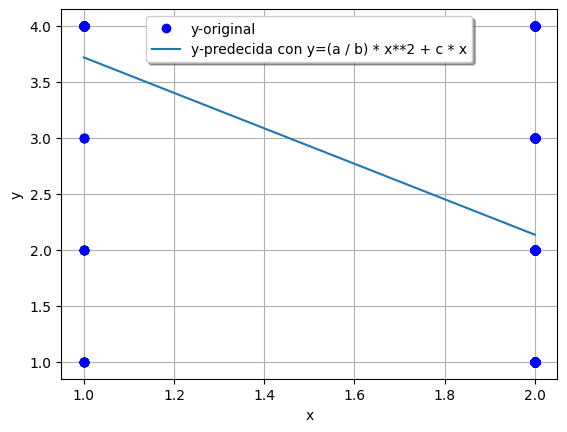

R^2 del Modelo 1: 0.2887055601311572
R del Modelo 1: 0.5373132793177153


In [34]:
Vars_Indep= df_filtrado3[["Administrador"]]
Var_Dep= df_filtrado3["dificultad"]
x= Vars_Indep
y= Var_Dep

def func_polinomial_inversa(x, a, b, c):  
    return (a / b) * x**2 + c * x      


# Ajuste de la curva  
parametros1, covs = curve_fit(func_polinomial_inversa, df_filtrado3["Administrador"], df_filtrado3["dificultad"])  


print("Parámetros ajustados:", parametros1)  
   
y_pred1 = func_polinomial_inversa(x, *parametros1)   

# Gráfico de los resultados  
plt.plot(x, y, 'bo', label="y-original")  # Datos originales  
plt.plot(x, y_pred1, label="y-predecida con y=(a / b) * x**2 + c * x")  # Curva ajustada  
plt.xlabel('x')  
plt.ylabel('y')  
plt.legend(loc='best', fancybox=True, shadow=True)  
plt.grid(True)  
plt.show()  

# Cálculo del coeficiente de determinación  
R2_Modelo1 = r2_score(y, y_pred1)  
print("R^2 del Modelo 1:", R2_Modelo1)  

# Cálculo de R  
R = np.sqrt(R2_Modelo1)  
print("R del Modelo 1:", R)

# Rene

In [35]:
#Rene
df_filtrado4 = df[df['Usuario'] == 27]  
df_filtrado4.head()

,Administrador,Usuario,botón correcto,tiempo de interacción,mini juego,número de interacción,color presionado,dificultad,Juego,auto push,tiempo de lección,tiempo de sesión
2549,1.0,27.0,1.0,29.30709,6.0,1.0,4.0,3.0,2.0,0.0,0.0,0.0
2550,1.0,27.0,1.0,27.90788,6.0,2.0,2.0,3.0,2.0,0.0,0.0,0.0
2551,1.0,27.0,0.0,19.05101,6.0,3.0,2.0,3.0,2.0,0.0,0.0,0.0
2552,1.0,27.0,1.0,16.30686,6.0,4.0,4.0,3.0,2.0,0.0,0.0,0.0
2553,1.0,27.0,0.0,9.36718,6.0,5.0,3.0,3.0,2.0,0.0,0.0,0.0


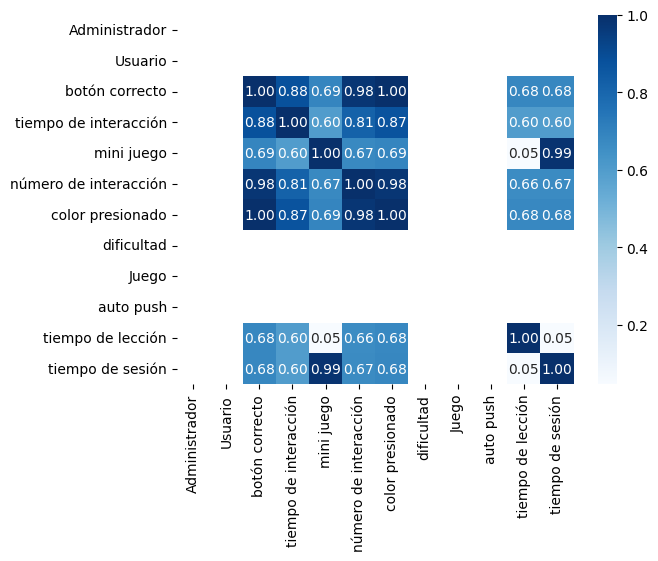

In [36]:
#Heat map 
Corr_Factors =df_filtrado4.corr()
Corr_Factors = abs(Corr_Factors)
Heat_Map_MA_Del_Rosario = sns.heatmap(Corr_Factors, cmap="Blues", annot=True, fmt=".2f")

### tiempo de interaccion con botón correcto (0.98) 0.87 el modelo mas alto

Parámetros ajustados: [-99.64222764 100.41351302  21.99372664]


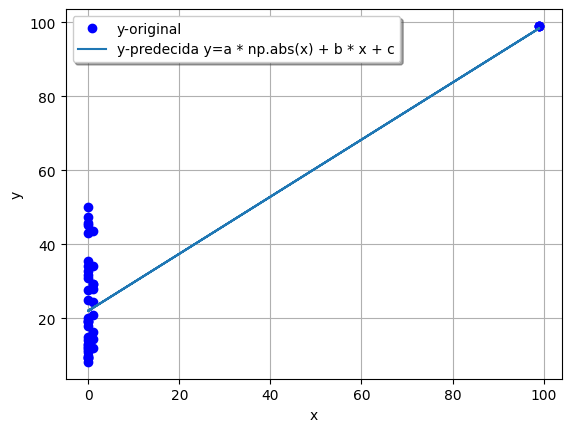

R^2 del Modelo 1: 0.7710299044601509
R del Modelo 1: 0.8780830851691376


In [37]:
Vars_Indep= df_filtrado4[["botón correcto"]]
Var_Dep= df_filtrado4["tiempo de interacción"]
x= Vars_Indep
y= Var_Dep

def func_valor_absoluto(x, a, b, c):  
    return a * np.abs(x) + b * x + c  
# Ajuste de la curva  
parametros1, covs = curve_fit(func_valor_absoluto, df_filtrado4["color presionado"], df_filtrado4["tiempo de interacción"])  


print("Parámetros ajustados:", parametros1)  
   
y_pred1 = func_valor_absoluto(x, *parametros1)   

# Gráfico de los resultados  
plt.plot(x, y, 'bo', label="y-original")  # Datos originales  
plt.plot(x, y_pred1, label="y-predecida y=a * np.abs(x) + b * x + c")  # Curva ajustada  
plt.xlabel('x')  
plt.ylabel('y')  
plt.legend(loc='best', fancybox=True, shadow=True)  
plt.grid(True)  
plt.show()  

# Cálculo del coeficiente de determinación  
R2_Modelo1 = r2_score(y, y_pred1)  
print("R^2 del Modelo 1:", R2_Modelo1)  

# Cálculo de R  
R = np.sqrt(R2_Modelo1)  
print("R del Modelo 1:", R)

### boton correcto con número de interacción (0.98) no sirvió la logaritmica

Parámetros ajustados: [98.92675862]


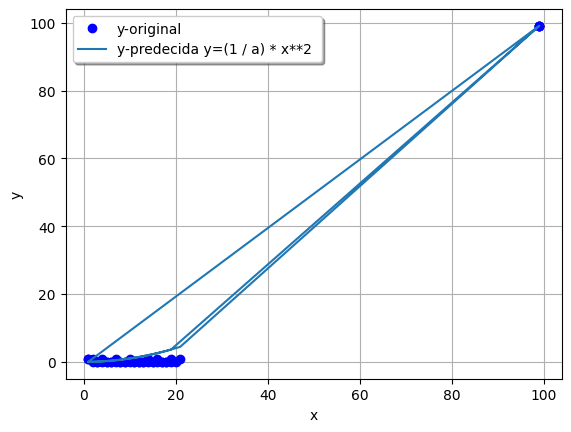

R^2 del Modelo 1: 0.9962664123885179
R del Modelo 1: 0.9981314604742794


In [38]:
Vars_Indep= df_filtrado4[["número de interacción"]]
Var_Dep= df_filtrado4["botón correcto"]
x= Vars_Indep
y= Var_Dep

def func_cuadratica_inversa(x, a):  
    return (1 / a) * x**2 
 
# Ajuste de la curva  
parametros1, covs = curve_fit(func_cuadratica_inversa, df_filtrado4["color presionado"], df_filtrado4["número de interacción"])  


print("Parámetros ajustados:", parametros1)  
   
y_pred1 = func_cuadratica_inversa(x, *parametros1)   

# Gráfico de los resultados  
plt.plot(x, y, 'bo', label="y-original")  # Datos originales  
plt.plot(x, y_pred1, label="y-predecida y=(1 / a) * x**2 ")  # Curva ajustada  
plt.xlabel('x')  
plt.ylabel('y')  
plt.legend(loc='best', fancybox=True, shadow=True)  
plt.grid(True)  
plt.show()  

# Cálculo del coeficiente de determinación  
R2_Modelo1 = r2_score(y, y_pred1)  
print("R^2 del Modelo 1:", R2_Modelo1)  

# Cálculo de R  
R = np.sqrt(R2_Modelo1)  
print("R del Modelo 1:", R)

### color presionado con número de interacción (0.98)

Parámetros ajustados: [98.92675862]


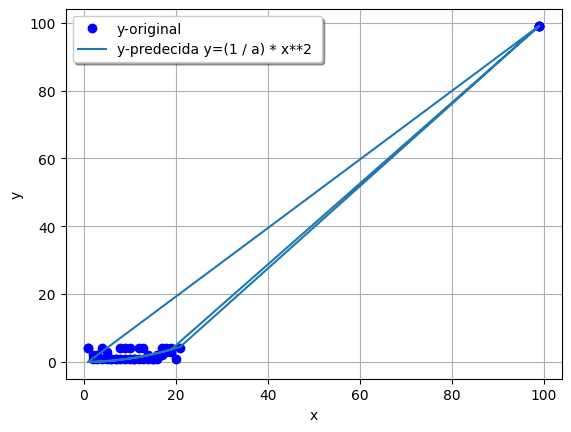

R^2 del Modelo 1: 0.9962340361883338
R del Modelo 1: 0.9981152419376902


In [39]:
Vars_Indep= df_filtrado4[["número de interacción"]]
Var_Dep= df_filtrado4["color presionado"]
x= Vars_Indep
y= Var_Dep
def func_cuadratica_inversa(x, a):  
    return (1 / a) * x**2 
 
# Ajuste de la curva  
parametros1, covs = curve_fit(func_cuadratica_inversa, df_filtrado4["color presionado"], df_filtrado4["número de interacción"])  


print("Parámetros ajustados:", parametros1)  
   
y_pred1 = func_cuadratica_inversa(x, *parametros1)   

# Gráfico de los resultados  
plt.plot(x, y, 'bo', label="y-original")  # Datos originales  
plt.plot(x, y_pred1, label="y-predecida y=(1 / a) * x**2 ")  # Curva ajustada  
plt.xlabel('x')  
plt.ylabel('y')  
plt.legend(loc='best', fancybox=True, shadow=True)  
plt.grid(True)  
plt.show()  

# Cálculo del coeficiente de determinación  
R2_Modelo1 = r2_score(y, y_pred1)  
print("R^2 del Modelo 1:", R2_Modelo1)  

# Cálculo de R  
R = np.sqrt(R2_Modelo1)  
print("R del Modelo 1:", R)


### dificultad 
No se pudo generar un modelo porque no existe correlación

# Sergio Angel

In [40]:
#Sergio Angel
df_filtrado5 = df[df['Usuario'] == 8]  
df_filtrado5.head()

,Administrador,Usuario,botón correcto,tiempo de interacción,mini juego,número de interacción,color presionado,dificultad,Juego,auto push,tiempo de lección,tiempo de sesión
679,5.0,8.0,1.0,2.946720,9.0,1.0,4.0,1.0,1.0,0.0,0.00000,0.0
680,5.0,8.0,1.0,2.066744,9.0,2.0,2.0,1.0,1.0,0.0,0.00000,0.0
681,5.0,8.0,1.0,2.600328,9.0,3.0,3.0,1.0,1.0,0.0,0.00000,0.0
682,5.0,8.0,1.0,3.249712,9.0,4.0,1.0,1.0,1.0,0.0,0.00000,0.0
683,5.0,8.0,99.0,99.000000,9.0,99.0,99.0,1.0,1.0,0.0,25.96476,0.0


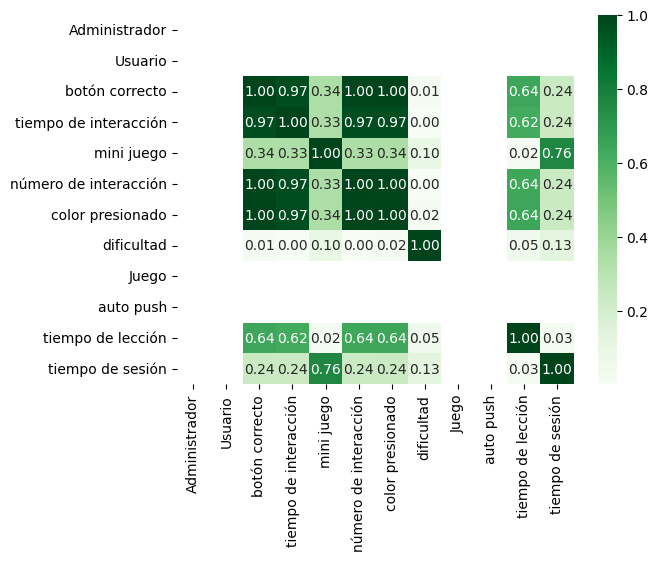

In [41]:
#Heat map 
Corr_Factors =df_filtrado5.corr()
Corr_Factors = abs(Corr_Factors)
Heat_Map_Sergio = sns.heatmap(Corr_Factors, cmap="Greens", annot=True, fmt=".2f")

In [42]:
Corr_Factors

,Administrador,Usuario,botón correcto,tiempo de interacción,mini juego,número de interacción,color presionado,dificultad,Juego,auto push,tiempo de lección,tiempo de sesión
Administrador,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Usuario,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
botón correcto,NaN,NaN,1.000000,0.967632,0.337287,0.996025,0.999578,0.013924,NaN,NaN,0.642902,0.243650
tiempo de interacción,NaN,NaN,0.967632,1.000000,0.334536,0.970672,0.967340,0.001449,NaN,NaN,0.622486,0.235913
mini juego,NaN,NaN,0.337287,0.334536,1.000000,0.334564,0.337420,0.097318,NaN,NaN,0.023321,0.763386
número de interacción,NaN,NaN,0.996025,0.970672,0.334564,1.000000,0.995654,0.004701,NaN,NaN,0.640628,0.242788
color presionado,NaN,NaN,0.999578,0.967340,0.337420,0.995654,1.000000,0.015815,NaN,NaN,0.642674,0.243563
dificultad,NaN,NaN,0.013924,0.001449,0.097318,0.004701,0.015815,1.000000,NaN,NaN,0.049418,0.130721
Juego,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
auto push,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### tiempo de interaccion con botón correcto (0.9676) vs (0.9691)

In [43]:
Vars_Indep= df_filtrado5[["botón correcto"]]
Var_Dep= df_filtrado5["tiempo de interacción"]
x= Vars_Indep
y= Var_Dep 

Parámetros ajustados: [-0.0246531   0.49884119  5.89265327]


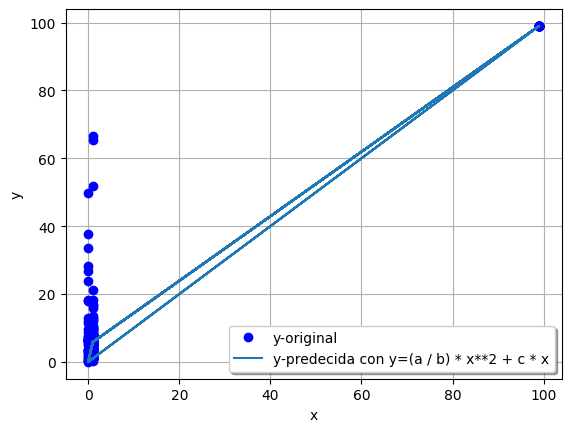

R^2 del Modelo 1: 0.9232867848049314
R del Modelo 1: 0.9608781321296325


In [45]:

def func_polinomial_inversa(x, a, b, c):  
    return (a / b) * x**2 + c * x

#df_filtrado2 = df_filtrado2[df_filtrado2["botón correcto"] > 0]  # es mayor que 0. Esto es crucial porque la función logarítmica no está definida para valores menores que 0

# Ajuste de la curva  
parametros1, covs = curve_fit(func_polinomial_inversa, df_filtrado5["botón correcto"], df_filtrado5["tiempo de interacción"])  


print("Parámetros ajustados:", parametros1)  
   
y_pred1 = func_polinomial_inversa(x, *parametros1)   

# Gráfico de los resultados  
plt.plot(x, y, 'bo', label="y-original")  # Datos originales  
plt.plot(x, y_pred1, label="y-predecida con y=(a / b) * x**2 + c * x")  # Curva ajustada  
plt.xlabel('x')  
plt.ylabel('y')  
plt.legend(loc='best', fancybox=True, shadow=True)  
plt.grid(True)  
plt.show()  

# Cálculo del coeficiente de determinación  
R2_Modelo1 = r2_score(y, y_pred1)  
print("R^2 del Modelo 1:", R2_Modelo1)  

# Cálculo de R  
R = np.sqrt(R2_Modelo1)  
print("R del Modelo 1:", R)  

### boton correcto con tiempo de interacción (0.967632) vs  (0.99)

Parámetros ajustados: [98.99726227]


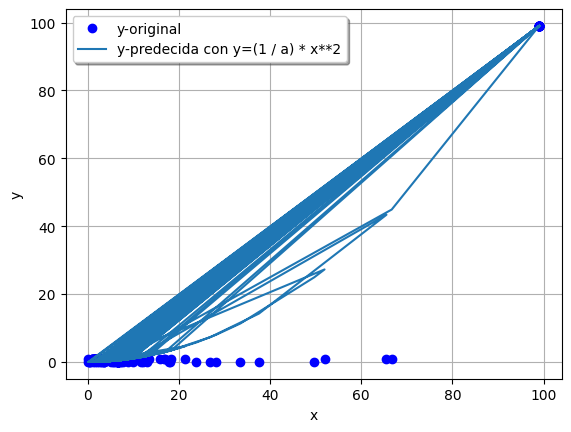

R^2 del Modelo 1: 0.9803674482330331
R del Modelo 1: 0.9901350656516681


In [46]:
Vars_Indep= df_filtrado5[["tiempo de interacción"]]
Var_Dep= df_filtrado5["botón correcto"]
x= Vars_Indep
y= Var_Dep

def func_cuadratica_inversa(x, a):  
    return (1 / a) * x**2  
 
# Ajuste de la curva  
parametros1, covs = curve_fit(func_cuadratica_inversa, df_filtrado5["botón correcto"], df_filtrado5["tiempo de interacción"])  


print("Parámetros ajustados:", parametros1)  
   
y_pred1 = func_cuadratica_inversa(x, *parametros1)   

# Gráfico de los resultados  
plt.plot(x, y, 'bo', label="y-original")  # Datos originales  
plt.plot(x, y_pred1, label="y-predecida con y=(1 / a) * x**2")  # Curva ajustada  
plt.xlabel('x')  
plt.ylabel('y')  
plt.legend(loc='best', fancybox=True, shadow=True)  
plt.grid(True)  
plt.show()  

# Cálculo del coeficiente de determinación  
R2_Modelo1 = r2_score(y, y_pred1)  
print("R^2 del Modelo 1:", R2_Modelo1)  

# Cálculo de R  
R = np.sqrt(R2_Modelo1)  
print("R del Modelo 1:", R)  

### color presionado con tiempo de interacción (0.9673)

Parámetros ajustados: [98.97446435]


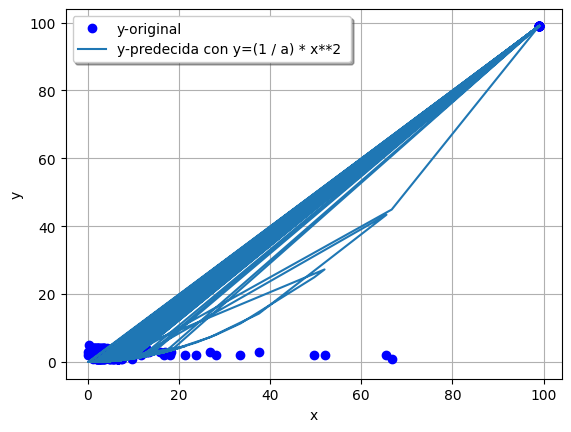

R^2 del Modelo 1: 0.9777616445172368
R del Modelo 1: 0.988818307130909


In [47]:
Vars_Indep= df_filtrado5[["tiempo de interacción"]]
Var_Dep= df_filtrado5["color presionado"]
x= Vars_Indep
y= Var_Dep

def func_cuadratica_inversa(x, a):  
    return (1 / a) * x**2  
 


# Ajuste de la curva  
parametros1, covs = curve_fit(func_cuadratica_inversa, df_filtrado5["color presionado"], df_filtrado5["tiempo de interacción"])  


print("Parámetros ajustados:", parametros1)  
   
y_pred1 = func_cuadratica_inversa(x, *parametros1)   

# Gráfico de los resultados  
plt.plot(x, y, 'bo', label="y-original")  # Datos originales  
plt.plot(x, y_pred1, label="y-predecida con y=(1 / a) * x**2 ")  # Curva ajustada  
plt.xlabel('x')  
plt.ylabel('y')  
plt.legend(loc='best', fancybox=True, shadow=True)  
plt.grid(True)  
plt.show()  

# Cálculo del coeficiente de determinación  
R2_Modelo1 = r2_score(y, y_pred1)  
print("R^2 del Modelo 1:", R2_Modelo1)  

# Cálculo de R  
R = np.sqrt(R2_Modelo1)  
print("R del Modelo 1:", R)  

### dificultad con tiempo de sesión (0.13)

Parámetros ajustados: [-14.87567138   4.35172228  17.57585062]


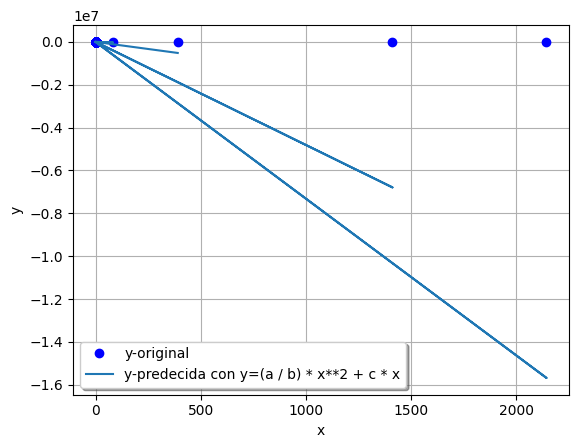

R^2 del Modelo 1: -1320210092705.0483
R del Modelo 1: nan


/var/folders/55/wyghdbg574v82z73n_3mj8cw0000gn/T/ipykernel_17695/3903393588.py:31: RuntimeWarning: invalid value encountered in sqrt
  R = np.sqrt(R2_Modelo1)


In [ ]:
Vars_Indep= df_filtrado5[["tiempo de sesión"]]
Var_Dep= df_filtrado5["dificultad"]
x= Vars_Indep
y= Var_Dep

def func_polinomial_inversa(x, a, b, c):  
    return (a / b) * x**2 + c * x

# Ajuste de la curva  
parametros1, covs = curve_fit(func_polinomial_inversa, df_filtrado5["dificultad"], df_filtrado5["tiempo de interacción"])  


print("Parámetros ajustados:", parametros1)  
   
y_pred1 = func_polinomial_inversa(x, *parametros1)   

# Gráfico de los resultados  
plt.plot(x, y, 'bo', label="y-original")  # Datos originales  
plt.plot(x, y_pred1, label="y-predecida con y=(a / b) * x**2 + c * x")  # Curva ajustada  
plt.xlabel('x')  
plt.ylabel('y')  
plt.legend(loc='best', fancybox=True, shadow=True)  
plt.grid(True)  
plt.show()  

# Cálculo del coeficiente de determinación  
R2_Modelo1 = r2_score(y, y_pred1)  
print("R^2 del Modelo 1:", R2_Modelo1)  

# Cálculo de R  
R = np.sqrt(R2_Modelo1)  
print("R del Modelo 1:", R)  

# Inadecuado Modelado del Comportamiento de los Datos
Interpretación de R²:

1. El coeficiente de determinación (R²) mide qué tan bien las variables independientes explican la variabilidad en la variable dependiente. Varía entre 0 y 1, donde 0 indica que el modelo no explica ninguna variabilidad y 1 indica un ajuste perfecto.
Un R² negativo significa que el modelo es mucho más pobre que simplemente usar la media de los datos como predicción. En otras palabras, el modelo no es útil en absoluto, y hace predicciones que están tan mal que, si ajustarás un modelo constante que simplemente predice la media de la variable dependiente, obtendrías un mejor resultado.
Causas Comunes de R² Negativo:

2. Modelo Inadecuado: La función de ajuste podría no ser la correcta para los datos. Puede que los datos tengan una relación no lineal que no estás capturando adecuadamente.
2. Error en los Datos: Puede haber errores en los datos, como valores atípicos extremos o datos incorrectos que afectan negativamente el ajuste del modelo.